# Transformadas geométricas

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(225, 225, 3)
Altura:  225
Largura:  225


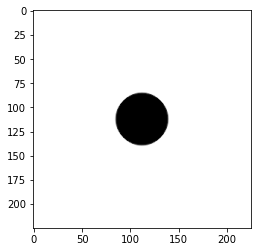

In [10]:
img1 = cv2.imread('circulo.png') #abrir a imagem

print(img1.shape)

altura, largura = img1.shape[:2]

print("Altura: ", altura)
print("Largura: ", largura )
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

## Translação

A translação de uma imagem é realizada utilizando o método da OpenCV chamado warpAffine().

Esse método espera o objeto de imagem que será transladado (primeiro parâmetro), uma matriz de deslocamento (segundo parâmetro) e as dimensões da imagem (terceiro parâmetro sendo passado como um array).

A matrix de deslocamento está sendo estabelecida indicando na primeira linha o deslocamento no eixo “x” e na segunda linha o deslocamento a ser aplicado no eixo “y”.

Na primeira translação do código abaixo, o deslocamento aplicado foi de 25 pixels para direita. Para deslocar para esquerda é preciso fornecer um valor negativo. A imagem também foi transladada para baixo 50 pixels e um valor negativo faria um deslocamento para cima.

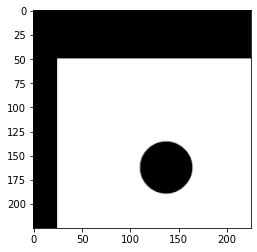

In [12]:
#translacao (deslocamento)
deslocamento = np.float32([[1, 0, 25], [0, 1, 50]])
deslocado = cv2.warpAffine(img1, deslocamento, (largura, altura))
plt.imshow(cv2.cvtColor(deslocado, cv2.COLOR_BGR2RGB))

## Escala

Os métodos de interpolação disponíveis são:
* INTER_NEAREST interpolação do vizinho mais próximo 1x1
* Interpolação bilinear INTER_LINEAR (usada por padrão) 2x2
* Interpolação bicúbica INTER_CUBIC sobre vizinhança de 4x4 pixels
* INTER_LANCZOS4 Interpolação de Lanczos sobre a vizinhança de 8x8 pixels
* Reamostragem INTER_AREA usando relação de área de pixel. Pode ser o preferido
  método para decimação de imagem, pois fornece resultados livres de moiré (distorções causadas por padrões de linhas ou quadradinhos muitos finos nos sensores das câmeras de vídeos). Mas quando a imagem é ampliada, é semelhante a o método INTER_NEAREST.

(112, 112, 3)


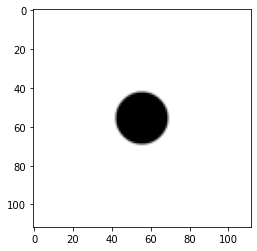

In [19]:
escala = 50 # porcentagem da imagem original
novaLargura = int(largura * escala / 100)
novaAltura = int(altura * escala / 100)
dimensaoNova = (novaLargura, novaLargura)
resized = cv2.resize(img1, dimensaoNova, interpolation = cv2.INTER_AREA)
print(resized.shape)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

(11250, 11250, 3)


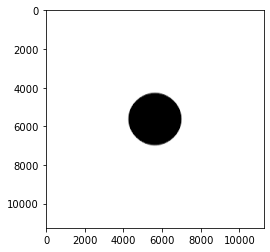

In [25]:
escalaX = 50 
escalaY = 10
novaLargura2 = int(largura * escalaX)
novaAltura2 = int(altura * escalaY)
dimensaoNova2 = (novaLargura2, novaLargura2)
resized2 = cv2.resize(img1, dimensaoNova2, interpolation = cv2.INTER_NEAREST)
print(resized2.shape)
plt.imshow(cv2.cvtColor(resized2, cv2.COLOR_BGR2RGB))

### Ignorando o aspect ratio. Ou seja, sem interpolação, a imagem ficará distorcida. 

(225, 1000, 3)


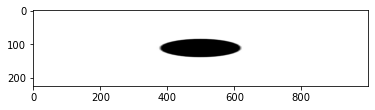

In [34]:
novaLargura = 1000
dimensaoNova3= (novaLargura, altura)
resized3 = cv2.resize(img1, dimensaoNova3)
print(resized3.shape)
plt.imshow(cv2.cvtColor(resized3, cv2.COLOR_BGR2RGB))

## Rotação

A rotação de imagem exige um pouco mais do que a translação, sendo preciso fornecer um ponto de fixação para rotacionar a partir desse ponto.

Aqui estão três rotateCodes disponíveis no OpenCV. Eles são:

* cv2.ROTATE_90_CLOCKWISE: Gira a imagem no sentido horário em 90 graus
* cv2.ROTATE_90_COUNTERCLOCKWISE: Gira a imagem no sentido anti-horário em 90 graus
* cv2.ROTATE_180: Gira a imagem no sentido horário em 180 graus

* Para outros valores, tem exemplo abaixo.

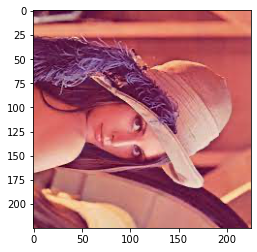

In [39]:
img2 = cv2.imread('lena.png') #abrir a imagem
alturaImg2, larguraImg2 = img2.shape[:2]

rotate_90 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE) 
plt.imshow(cv2.cvtColor(rotate_90, cv2.COLOR_BGR2RGB))



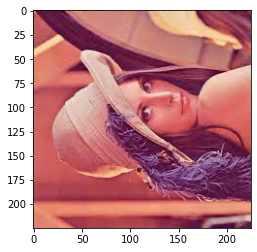

In [37]:

rotate_90_counter = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE) 
plt.imshow(cv2.cvtColor(rotate_90_counter, cv2.COLOR_BGR2RGB))



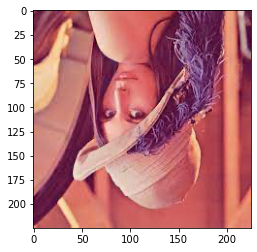

In [38]:
rotate_180 = cv2.rotate(img2, cv2.ROTATE_180)
plt.imshow(cv2.cvtColor(rotate_180, cv2.COLOR_BGR2RGB))

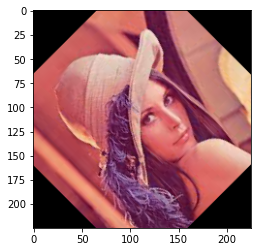

In [41]:
### Outras rotações são feitas por:

#rotacao
ponto = (larguraImg2 / 2, alturaImg2 / 2) #ponto no centro da figura
rotacao = cv2.getRotationMatrix2D(ponto, 45, 1.0)
rotacionado = cv2.warpAffine(img2, rotacao, (larguraImg2, alturaImg2))
plt.imshow(cv2.cvtColor(rotacionado, cv2.COLOR_BGR2RGB))


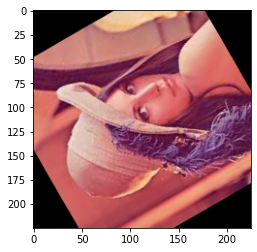

In [43]:
rotacao2 = cv2.getRotationMatrix2D(ponto, 120, 1.0)
rotacionado2 = cv2.warpAffine(img2, rotacao2, (larguraImg2, alturaImg2))
plt.imshow(cv2.cvtColor(rotacionado2, cv2.COLOR_BGR2RGB))